<a href="https://colab.research.google.com/github/ass007-mouele/Python_NoteBook/blob/master/Ass__Linear_regression_1_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)
df_weather = df_weather.iloc[:,[0,1,2, -4]]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Univariate linear regression with Scikit-Learn

Scikit-Learn is the greatest Machine Learning library for Python. Do you remember that you can do Linear regression with NumPy ? You can do the same with Scikit-Learn. And many other things!
Let's start with univariate Linear regression, to learn the syntax.

## Print a regplot with seaborn to show a linear regression between Sunhours (on the X-axis) and MAX temperature (on the Y-axis).

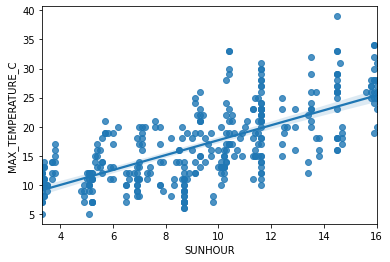

In [0]:
# Your code here :
sns.regplot(df_weather["SUNHOUR"],df_weather["MAX_TEMPERATURE_C"])

## Train the model
You just have to read and execute the code below

In [0]:
# Scikit-Learn can find the coefficients of the linear regression
from sklearn.linear_model import LinearRegression

# First of all, you have to define 2 series :
# X-axis : the correlated column, here it is Sunhours
X = df_weather[['SUNHOUR']] 

# Y-axis : the column to predict, so MAX Temperature here
y = df_weather['MAX_TEMPERATURE_C'] 

# Hey, why is "X" in uppercase and "y" in lowercase ? That's a good point, we'll see that in the next quest. Now, you just have to use this.

# To train a machine learning model (here, it will find the equation of the linear regression), you just have launch the ".fit" method.
modelLR = LinearRegression().fit(X, y)


## Explore the model

In [0]:
# Your model is trained, it has now some attributes.
# Coefficient, it's the "a" in your equation "aX + b"
print("coefficient :",modelLR.coef_)

# Interception, it's the "b" in your equation "aX + b"
print("interception :", modelLR.intercept_)


coefficient : [1.28422116]
interception : 4.8472953557195435


## Prediction for 1 value

In [0]:
# You can "predict" the Max Temperature from the Sunhours
# For example, let's try if Sunhours is 10 :

# Hand calculation :
print("By hand :", modelLR.coef_ * 10 + modelLR.intercept_ )

# With a Scikit-Learn function :
print("Scikit-Learn :  ", modelLR.predict([[10]])  )

By hand : [17.68950691]
Scikit-Learn :   [17.68950691]


## Predictions for multiple values (a Serie)
Let's predict MAX temperature for the Sunhour column of your DataFrame.

Note : You'll have to precise your column with double "[", like that  : df[['your_column]] 

*Why ? We'll see that in the next quest.*

In [0]:
# Find a way to store the result of the prediction in a new column 'predict" of the dataframe
modelLR.predict(df_weather[['SUNHOUR']])

array([11.39682325, 16.02001941, 16.02001941, 11.39682325, 16.02001941,
        9.08522517, 11.39682325,  9.08522517,  9.08522517, 16.02001941,
       11.39682325, 13.70842133,  9.08522517,  9.08522517, 16.02001941,
        9.21364728, 16.02001941, 16.02001941,  9.21364728, 11.52524536,
       16.02001941,  9.21364728, 11.52524536, 11.52524536,  9.21364728,
        9.3420694 , 15.37790883, 13.19473287, 11.0115569 , 13.19473287,
       11.13997902, 11.13997902, 17.43266268, 17.43266268, 11.13997902,
       11.13997902, 11.26840113, 13.32315498, 11.26840113, 13.32315498,
       15.50633095, 15.50633095, 17.81792903, 17.81792903, 17.94635114,
       17.94635114, 15.63475306, 17.94635114, 13.57999921, 11.52524536,
       17.68950691, 18.20319537, 18.20319537, 18.71688384, 15.76317518,
       18.84530595, 18.84530595, 18.97372807, 11.91051171, 17.81792903,
       17.81792903, 12.03893383, 15.89159729, 17.81792903, 12.03893383,
       16.02001941, 17.94635114, 12.42420017, 14.22210979, 17.94

## Visualisations
You can predict the Max temperature from any value of Sunhour. Your prediction is stored in a column, you can now visualize it.

It's to you now :
Create on the same scatterplot chart :
- X-axis : Sunhours
- Y-axis : MAX temperatures in blue dots and 'predict' in red dots.

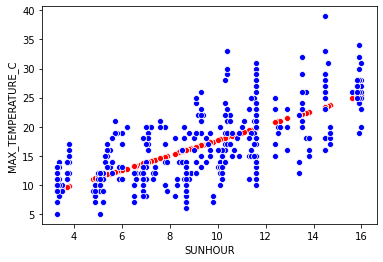

In [0]:
# Your code here :

sns.scatterplot(x=df_weather['SUNHOUR'],y=modelLR.predict(df_weather[['SUNHOUR']]),color='r')
sns.scatterplot(x=df_weather['SUNHOUR'],y=df_weather["MAX_TEMPERATURE_C"],color='b')

Create on the same scatterplot chart :
- X-axis : DATE
- Y-axis : MAX temperatures in blue dots and 'predict' in red dots.

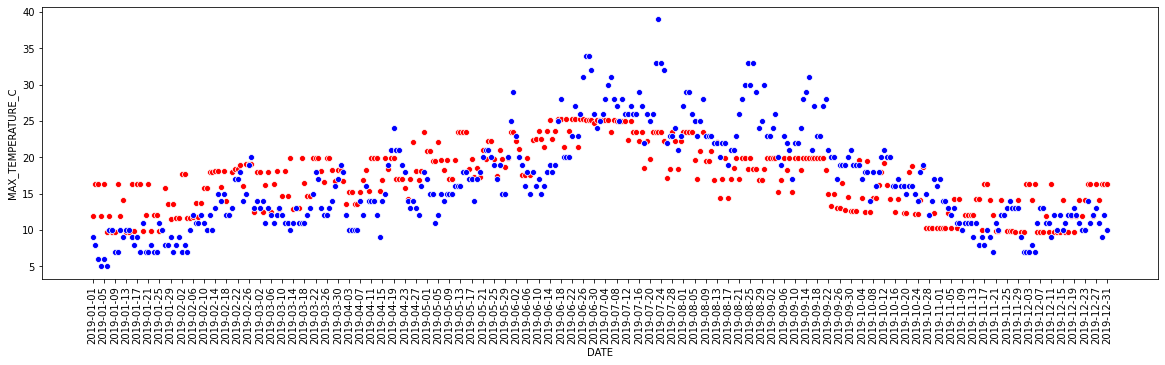

In [0]:
# Your code here :

fig = plt.figure(figsize = (20, 5))

plt.xticks(range(0, 365, 4), rotation = 90)

sns.scatterplot(x=df_weather['DATE'],y=modelLR.predict(df_weather[['SUNHOUR']]),color='r')
sns.scatterplot(x=df_weather['DATE'],y=df_weather["MAX_TEMPERATURE_C"],color='b')


Hey, but it doesn't seem linear ! And yet it is...

# Predictions on a more correlated column
Do the same steps to obtain a new colum "predict2". Your goal is to predict "MAX temperature" from the "MIN temperature" column.

In [0]:
# Your code here :
X = df_weather[['MIN_TEMPERATURE_C']] 
y = df_weather['MAX_TEMPERATURE_C'] 
modelLR = LinearRegression().fit(X, y)
modelLR.predict(df_weather[['MIN_TEMPERATURE_C']])


array([10.57999942, 11.80274147,  5.68903121,  4.46628916,  4.46628916,
        8.13451531, 10.57999942, 13.02548352, 11.80274147,  6.91177326,
        8.13451531,  9.35725737, 14.24822557, 15.47096762, 10.57999942,
        6.91177326, 11.80274147,  6.91177326, 13.02548352, 10.57999942,
        5.68903121, 11.80274147,  9.35725737,  5.68903121, 15.47096762,
       15.47096762, 14.24822557, 10.57999942, 11.80274147,  9.35725737,
        8.13451531, 13.02548352,  8.13451531,  5.68903121, 11.80274147,
       10.57999942, 17.91645172, 16.69370967, 15.47096762, 16.69370967,
       15.47096762, 11.80274147,  9.35725737,  8.13451531,  8.13451531,
       13.02548352, 13.02548352, 14.24822557, 11.80274147, 11.80274147,
       10.57999942, 13.02548352, 14.24822557, 15.47096762, 11.80274147,
       11.80274147, 14.24822557, 16.69370967, 16.69370967, 14.24822557,
       13.02548352, 16.69370967, 14.24822557, 14.24822557, 16.69370967,
       13.02548352, 11.80274147, 15.47096762, 15.47096762, 11.80

## Scatterplot 1
- X-axis : MIN temperature
- Y-axis : MAX temperatures in blue dots and 'predict2' in red dots.

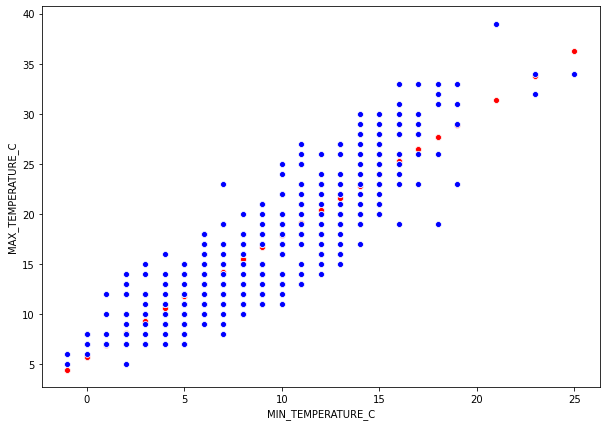

In [0]:
#Your code here :
df_weather['predict2']=modelLR.predict(df_weather[['MIN_TEMPERATURE_C']])
plt.figure(figsize=(10,7))
sns.scatterplot(x=df_weather['MIN_TEMPERATURE_C'],y=df_weather['predict2'],color='r')
sns.scatterplot(x=df_weather['MIN_TEMPERATURE_C'],y=df_weather["MAX_TEMPERATURE_C"],color='b')


## Scatterplot 2
- X-axis : DATE
- Y-axis : MAX temperatures in blue dots and 'predict2' in red dots.

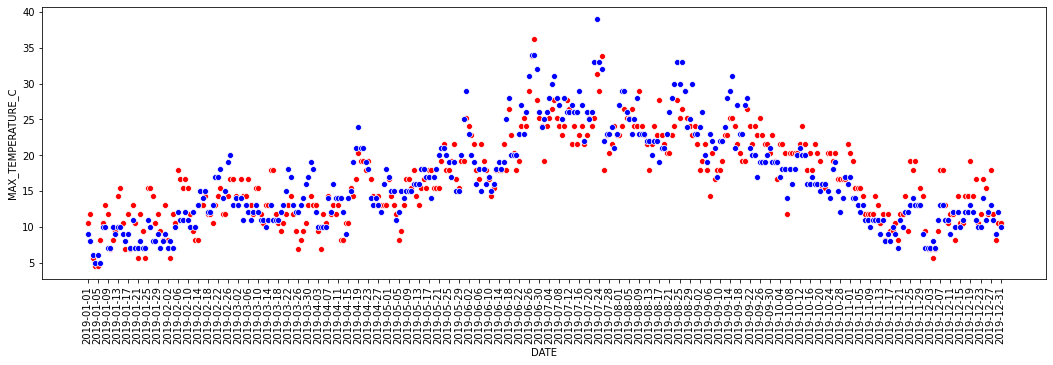

In [0]:
# Your code here :
fig = plt.figure(figsize = (18, 5))
plt.xticks(range(0, 365, 4), rotation = 90)
sns.scatterplot(x=df_weather['DATE'],y=df_weather['predict2'],color='r')
sns.scatterplot(x=df_weather['DATE'],y=df_weather["MAX_TEMPERATURE_C"],color='b')
